##2) Data Manipulation & Visualization - Project 3: Weather Data Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/weather_data.csv'
weather_data = pd.read_csv('/content/weather_data.csv')
weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time'])
monthly_data = weather_data.set_index('Date_Time').groupby('Location').resample('ME').mean().reset_index()

# a) Temperature Trends Over Time (Line Plot)

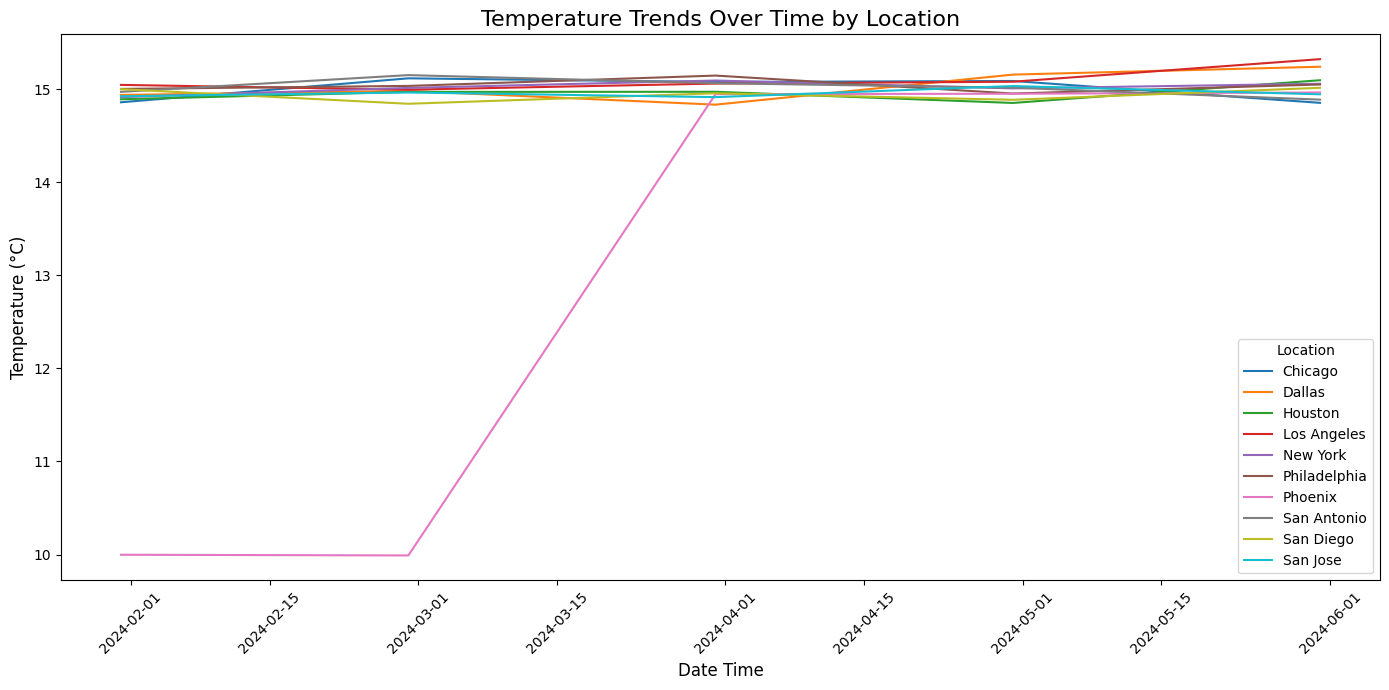

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Date_Time', y='Temperature_C', hue='Location', linewidth=1.5)
plt.title('Temperature Trends Over Time by Location', fontsize=16)
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# b) Temperature vs. Humidity (Scatter Plot)

<ipython-input-7-c2333685bb2a>:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


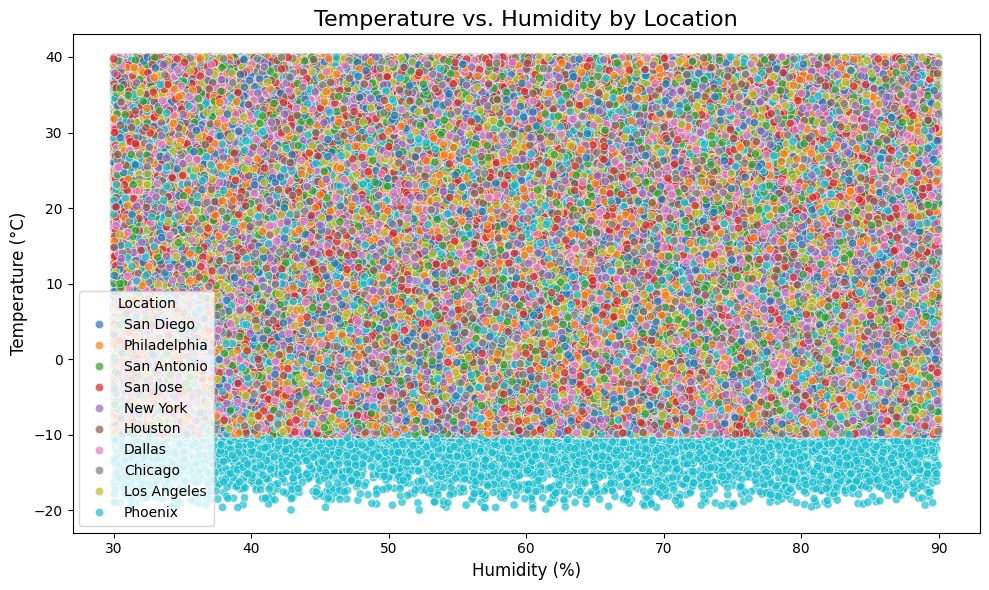

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='Humidity_pct', y='Temperature_C', hue='Location', alpha=0.7)
plt.title('Temperature vs. Humidity by Location', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

# 3. Extreme Temperature Analysis (Bar Chart)

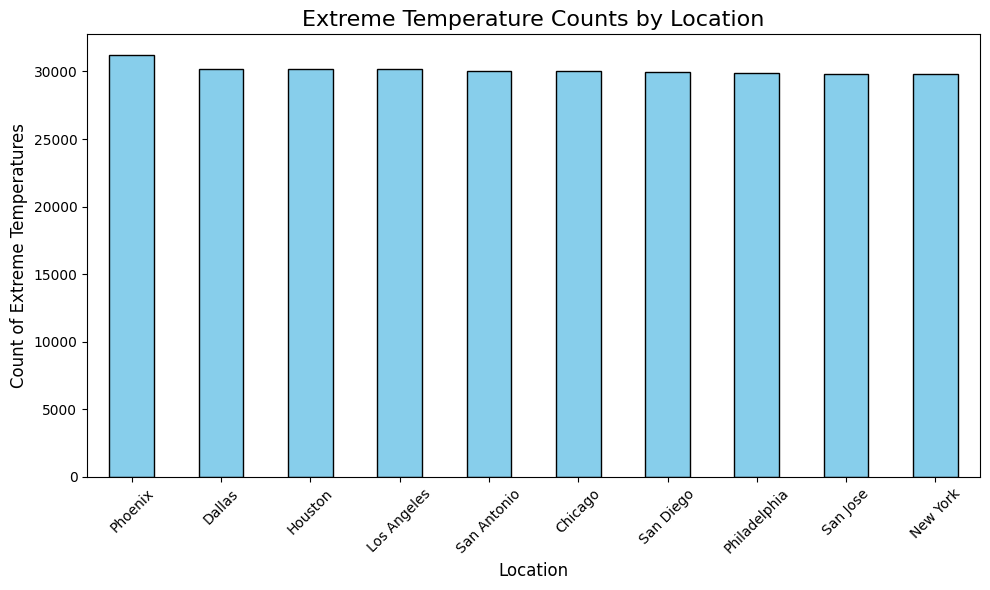

In [8]:
extreme_thresholds = (weather_data['Temperature_C'] < 0) | (weather_data['Temperature_C'] > 35)
extreme_counts = weather_data[extreme_thresholds].groupby('Location').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
extreme_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Extreme Temperature Counts by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count of Extreme Temperatures', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()